In [ ]:
import numpy as np
import pandas as pd

In [ ]:
mush_train = pd.read_csv("Mushroom_Train.csv")
mush_test = pd.read_csv("Mushroom_Test.csv")

## Dealing with missing data

In [ ]:
mush_train.replace('?',np.nan,inplace=True)
print(len(mush_train.columns),"columns, after dropping NA,",len(mush_train.dropna(axis=1).columns))
mush_train.dropna(axis=1,inplace=True)

23 columns, after dropping NA, 22


In [ ]:
mush_test.replace('?',np.nan,inplace=True)
print(len(mush_test.columns),"columns, after dropping NA,",len(mush_test.dropna(axis=1).columns))
mush_test.dropna(axis=1,inplace=True)

23 columns, after dropping NA, 22


# Classes

In [ ]:
target = 'class'
features = mush_train.columns[mush_train.columns != target]
classes = mush_train[target].unique()
classes

array(['p', 'e'], dtype=object)

# Probabilty Calculation

In [ ]:
probs = {}
probcl = {}
for x in classes:
    mushcl = mush_train[mush_train[target]==x][features]
    clsp = {}
    tot = len(mushcl)
    for col in mushcl.columns:
        colp = {}
        for val,cnt in mushcl[col].value_counts().iteritems():
            pr = cnt/tot
            colp[val] = pr
        clsp[col] = colp
    probs[x] = clsp
    probcl[x] = len(mushcl)/len(mush_train)

In [ ]:
def probabs(x):
    #X - pandas Series with index as feature
    if not isinstance(x,pd.Series):
        raise IOError("Arg must of type Series")
    probab = {}
    for cl in classes:
        pr = probcl[cl]
        for col,val in x.iteritems():
            try:
                pr *= probs[cl][col][val]
            except KeyError:
                pr = 0
        probab[cl] = pr
    return probab

In [ ]:
def classify(x):
    probab = probabs(x)
    mx = 0
    mxcl = ''
    for cl,pr in probab.items():
        if pr > mx:
            mx = pr
            mxcl = cl
    return mxcl

# Model Evaluation

## Train data

In [ ]:

b = []
for i in mush_train.index:
    #print(classify(mush.loc[i,features]),mush.loc[i,target])
    b.append(classify(mush_train.loc[i,features]) == mush_train.loc[i,target])
print(sum(b),"correct of",len(mush_train))
print("Accuracy:", sum(b)/len(mush_train))

7563 correct of 7600
Accuracy: 0.9951315789473684


# Test data

In [ ]:
#Test data
b = []
for i in mush_test .index:
    #print(classify(mush.loc[i,features]),mush.loc[i,target])
    b.append(classify(mush_test .loc[i,features]) == mush_test .loc[i,target])
print(sum(b),"correct of",len(mush_test ))
print("Accuracy:",sum(b)/len(mush_test ))

520 correct of 524
Accuracy: 0.9923664122137404


In [ ]:
A=np.zeros((2,2))
for i in mush_test.index:
  if (mush_test.loc[i,target])=='e' :
    if classify(mush_test .loc[i,features])==(mush_test .loc[i,target]):
      A[0,0]+=1
    elif (classify(mush_test .loc[i,features]))!=(mush_test .loc[i,target]):
      A[0,1]+=1
  elif (mush_test .loc[i,target])=='p':
    if (classify(mush_test .loc[i,features]))==(mush_test .loc[i,target]):
      A[1,1]+=1
    elif (classify(mush_test .loc[i,features]))!=(mush_test .loc[i,target]):
      A[1,0]+=1

In [ ]:
import seaborn as sns

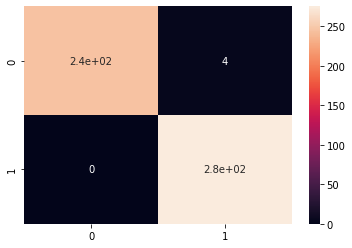

In [ ]:
sns.heatmap(A,annot=True)